In [2]:
import nilearn
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import glob
import re

Import csv of model outputs and make compressed nifti files for each roi, then add together to make whole-brain map


In [ ]:
# Import CSV
modOutput = pd.read_csv('../../estimates/spreadsheets/mod0.csv')


In [28]:

def makeStatMap(estimates, rois, mapName):
    os.system('mkdir ../../estimates/temp')
    temps = [None]*(len(estimates))
    
    for index, estimate in enumerate(estimates):
        roiMask = '../../roi/' + rois[index] + '.nii.gz'
        tempsMap = '../../estimates/temp/'
        temps[index] = '../../estimates/temp/' + rois[index] + '.nii.gz'
        os.system('fslmaths %s -mul %s %s'%(roiMask, estimate, temps[index]))
        if index == 0:
            os.system('fslmaths %s -mul 1 %s'%(temps[index], tempsMap))
        else:
            os.system('fslmaths %s -add %s %s'%(tempsMap, temps[index], tempsMap))
            
    finalOutput = '../../estimates/images/%s.nii.gz'%(mapName)
    os.system('cp %s.nii.gz %s'%(tempsMap, finalOutput))
    os.system('rm -rf ../../estimates/temp/')
    
    
    
    

In [29]:
# Run the function to output whole-brain roi maps
makeStatMap(modOutput['cope_mean_scaled'], modOutput['roi'], 'mod0_mean')
makeStatMap(modOutput['theta_int_95_lower'], modOutput['roi'], 'mod0_int_95_lower')
makeStatMap(modOutput['theta_int_95_upper'], modOutput['roi'], 'mod0_int_95_upper')

Plot the Roi Maps!

In [11]:
meanPath = '../../estimates/images/mod0_mean.nii.gz'
lwr_95Path = '../../estimates/images/mod0_int_95_lower.nii.gz'
upr_95Path ='../../estimates/images/mod0_int_95_upper.nii.gz'
meanMod0 = image.load_img(meanPath)
lwr_95Mod0 = image.load_img(lwr_95Path)
upr_95Mod0 = image.load_img(upr_95Path)

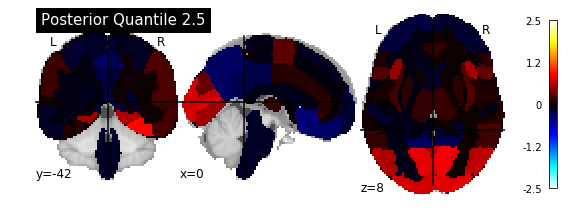

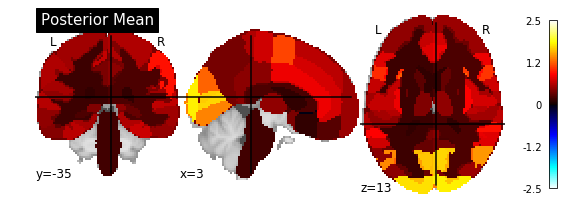

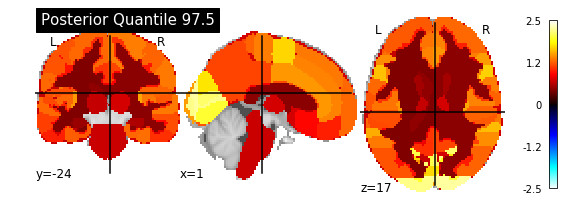

In [46]:
plotting.plot_stat_map(lwr_95Mod0, title = 'Posterior Quantile 2.5', vmax = 2.5, symmetric_cbar =True)
plotting.plot_stat_map(meanMod0, title = 'Posterior Mean', vmax = 2.5, symmetric_cbar =True)
plotting.plot_stat_map(upr_95Mod0, title = 'Posterior Quantile 97.5', vmax = 2.5, symmetric_cbar =True)

# Compare with mean t-stat map from a mass univariate approach

## Note: the univariate map includes all 3 waves and the model gives varying slopes/intercepts by participant

In [3]:
univariateMap = '/danl/SB/PaulCompileTGNG/mri_scripts/6_neuropointillist/haba/6motion_no_errors_comps_age_center_nlme/ageCenterNLME.meanTstat.nii.gz'
univariateMap = image.load_img(univariateMap)

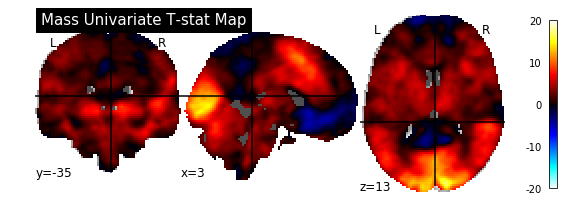

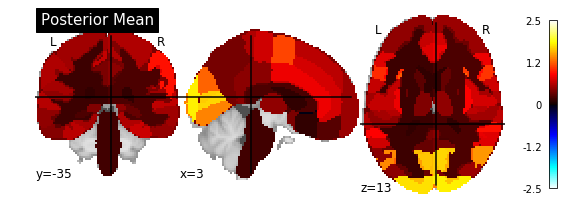

In [12]:
plotting.plot_stat_map(univariateMap, vmax = 20, symmetric_cbar =True, cut_coords = (3, -35, 13), title = 'Mass Univariate T-stat Map')
plotting.plot_stat_map(meanMod0, title = 'Posterior Mean', vmax = 2.5, symmetric_cbar =True)
